In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip test_set.zip

Archive:  test_set.zip
replace test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip training_set.zip

Archive:  training_set.zip
replace training_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
training_set='/content/training_set'
validation_set='/content/test_set'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_data=train_datagen.flow_from_directory(
        training_set,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary'
          )

valid_data=test_datagen.flow_from_directory(
        validation_set,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary'
          )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
# defining model architecture
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(256,kernel_initializer='he_normal',activation='relu'))
model.add(layers.Dense(512,kernel_initializer='he_normal',activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

In [ ]:
model_history=model.fit_generator(
        train_data,
        steps_per_epoch= 200,         # 2000 images = batch_size(20) * steps(100)
        epochs=15,
        validation_data=valid_data,
        validation_steps=100,             # 1000 images = batch_size * steps               
      )

Epoch 1/15
200/200 [==============================] - 18s 90ms/step - loss: 0.6118 - accuracy: 0.6587 - val_loss: 0.5753 - val_accuracy: 0.7130
Epoch 2/15
200/200 [==============================] - 17s 87ms/step - loss: 0.5644 - accuracy: 0.7117 - val_loss: 0.5485 - val_accuracy: 0.7300
Epoch 3/15
200/200 [==============================] - 18s 89ms/step - loss: 0.5282 - accuracy: 0.7375 - val_loss: 0.5419 - val_accuracy: 0.7235
Epoch 4/15
200/200 [==============================] - 17s 87ms/step - loss: 0.4892 - accuracy: 0.7607 - val_loss: 0.5325 - val_accuracy: 0.7350
Epoch 5/15
200/200 [==============================] - 17s 87ms/step - loss: 0.4534 - accuracy: 0.7875 - val_loss: 0.5156 - val_accuracy: 0.7485
Epoch 6/15
200/200 [==============================] - 18s 89ms/step - loss: 0.4348 - accuracy: 0.7980 - val_loss: 0.5111 - val_accuracy: 0.7550
Epoch 7/15
200/200 [==============================] - 18s 88ms/step - loss: 0.3889 - accuracy: 0.8270 - val_loss: 0.5083 - val_accuracy:

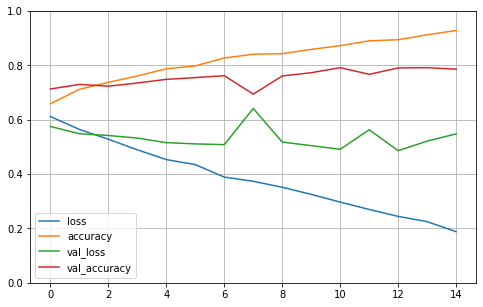

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# Checking the accuracy of the model
acc=model_history.history['accuracy']

In [ ]:
acc[14]

0.9282500147819519

**Transfer Learning using VGG16**

In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
Image_size=[224,224]

In [ ]:
vgg=VGG16(input_shape=Image_size+[3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# we don't train the  existing weihghts
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
folder=glob('/content/training_set/*')
x=Flatten()(vgg.output)
prediction=Dense(len(folder)-1,activation='sigmoid')(x) 

In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
              )

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_data=train_datagen.flow_from_directory(
        training_set,
        target_size=(224,224),
        batch_size=20,
        class_mode='binary'
          )

valid_data=test_datagen.flow_from_directory(
        validation_set,
        target_size=(224,224),
        batch_size=20,
        class_mode='binary'
          )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
model_history=model.fit_generator(
        train_data,
        steps_per_epoch= 200,         # 2000 images = batch_size(20) * steps(100)
        epochs=15,
        validation_data=valid_data,
        validation_steps=100,             # 1000 images = batch_size * steps               
      )

Epoch 1/15
200/200 [==============================] - 31s 148ms/step - loss: 0.4101 - accuracy: 0.7927 - val_loss: 0.2217 - val_accuracy: 0.9085
Epoch 2/15
200/200 [==============================] - 31s 154ms/step - loss: 0.1905 - accuracy: 0.9183 - val_loss: 0.1920 - val_accuracy: 0.9195
Epoch 3/15
200/200 [==============================] - 33s 164ms/step - loss: 0.1575 - accuracy: 0.9369 - val_loss: 0.3432 - val_accuracy: 0.8630
Epoch 4/15
200/200 [==============================] - 32s 162ms/step - loss: 0.1488 - accuracy: 0.9435 - val_loss: 0.1922 - val_accuracy: 0.9220
Epoch 5/15
200/200 [==============================] - 32s 160ms/step - loss: 0.1095 - accuracy: 0.9616 - val_loss: 0.1974 - val_accuracy: 0.9215
Epoch 6/15
200/200 [==============================] - 32s 161ms/step - loss: 0.0778 - accuracy: 0.9757 - val_loss: 0.1918 - val_accuracy: 0.9220
Epoch 7/15
200/200 [==============================] - 32s 160ms/step - loss: 0.0756 - accuracy: 0.9710 - val_loss: 0.1936 - val_ac

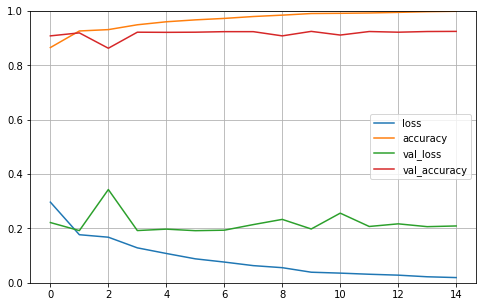

In [ ]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# Checking the accuracy of the model
acc=model_history.history['accuracy']
acc[14]

0.9990000128746033